<a href="https://colab.research.google.com/github/pushkarsingh-001/project-ai-ml/blob/main/Employee_Attrition_(EDA_%26_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Description

In [31]:
"""

The dataset contains information about employees in a company. Here is a description of each column:

Age: The age of the employee (integer).
Attrition: Whether the employee has left the company or not (object).
BusinessTravel: Frequency of business travel (object).
DailyRate: The daily rate of pay for the employee (integer).
Department: Department in which the employee works (object).
DistanceFromHome: Distance from home to work in miles (integer).
Education: Level of education of the employee (integer).
EducationField: Field of education of the employee (object).
EmployeeCount: Number of employees (always 1) (integer).
EmployeeNumber: Unique identifier for each employee (integer).
EnvironmentSatisfaction: Satisfaction level with the work environment (integer).
Gender: Gender of the employee (object).
HourlyRate: Hourly rate of pay for the employee (integer).
JobInvolvement: Level of job involvement (integer).
JobLevel: Level of job within the company (integer).
JobRole: Role of the employee in the company (object).
JobSatisfaction: Satisfaction level with the job (integer).
MaritalStatus: Marital status of the employee (object).
MonthlyIncome: Monthly income of the employee (integer).
MonthlyRate: Monthly rate of pay for the employee (integer).
NumCompaniesWorked: Number of companies the employee has worked for (integer).
Over18: Whether the employee is over 18 years old (object).
OverTime: Whether the employee works overtime or not (object).
PercentSalaryHike: Percentage increase in salary (integer).
PerformanceRating: Performance rating of the employee (integer).
RelationshipSatisfaction: Satisfaction level with work relationships (integer).
StandardHours: Standard number of working hours (always 80) (integer).
StockOptionLevel: Level of stock option (integer).
TotalWorkingYears: Total number of years worked (integer).
TrainingTimesLastYear: Number of training sessions attended last year (integer).
WorkLifeBalance: Level of work-life balance (integer).
YearsAtCompany: Number of years spent at the company (integer).
YearsInCurrentRole: Number of years in the current role (integer).
YearsSinceLastPromotion: Number of years since the last promotion (integer).
YearsWithCurrManager: Number of years with the current manager (integer)"""

'\n\nThe dataset contains information about employees in a company. Here is a description of each column:\n\nAge: The age of the employee (integer).\nAttrition: Whether the employee has left the company or not (object).\nBusinessTravel: Frequency of business travel (object).\nDailyRate: The daily rate of pay for the employee (integer).\nDepartment: Department in which the employee works (object).\nDistanceFromHome: Distance from home to work in miles (integer).\nEducation: Level of education of the employee (integer).\nEducationField: Field of education of the employee (object).\nEmployeeCount: Number of employees (always 1) (integer).\nEmployeeNumber: Unique identifier for each employee (integer).\nEnvironmentSatisfaction: Satisfaction level with the work environment (integer).\nGender: Gender of the employee (object).\nHourlyRate: Hourly rate of pay for the employee (integer).\nJobInvolvement: Level of job involvement (integer).\nJobLevel: Level of job within the company (integer).\n

# Import Needed Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import data

In [33]:
df= pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [34]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


# Exploratory Data Analysis (EDA)

In [35]:
#Show the dimensionality of the dataFrame (rows, cols)
df.shape

(1470, 35)

In [36]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [37]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [38]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [39]:
# Show the data type of each column
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [40]:
#Check if there are any null values
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


No missing values

In [41]:
#check repeated rows
df.duplicated().sum()

np.int64(0)

In [42]:
#Categorical Columns
cat = df.select_dtypes(['object']).columns
#Numerical Columns
num = df.select_dtypes(['number']).columns


print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [43]:
#Show the number of unique observations for each column
df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [44]:
#PrintUnique values of categorical columns
for i in cat:
    print("unique values of:",i,set(df[i]))

unique values of: Attrition {'Yes', 'No'}
unique values of: BusinessTravel {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
unique values of: Department {'Human Resources', 'Research & Development', 'Sales'}
unique values of: EducationField {'Marketing', 'Medical', 'Technical Degree', 'Life Sciences', 'Other', 'Human Resources'}
unique values of: Gender {'Male', 'Female'}
unique values of: JobRole {'Laboratory Technician', 'Research Director', 'Sales Executive', 'Healthcare Representative', 'Manufacturing Director', 'Research Scientist', 'Sales Representative', 'Manager', 'Human Resources'}
unique values of: MaritalStatus {'Divorced', 'Married', 'Single'}
unique values of: Over18 {'Y'}
unique values of: OverTime {'Yes', 'No'}


In [45]:
#"StandardHours" is 80 for everyone , "EmployeeCount" and "Over18" is 1 for everyone
# We delete these variable from the dataset
df = df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis =1)

# target column

In [46]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [47]:
##Count the unique values in the target column
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


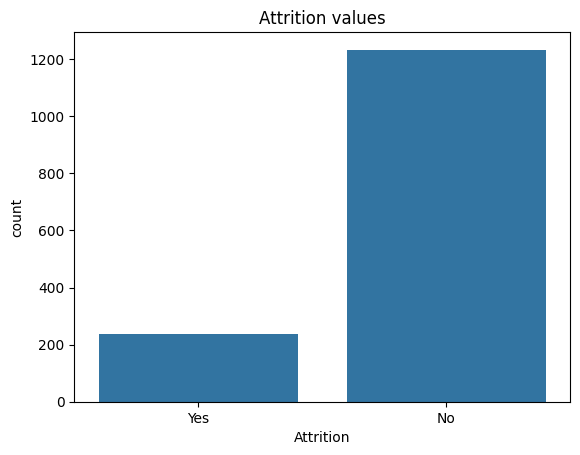

In [48]:
sns.countplot(x=df['Attrition'])
plt.title('Attrition values');

In [49]:
# 1 for NO , 0 for Yes
df["Attrition"] = df["Attrition"].map({"Yes": 0, "No":1})

In [50]:
# select all categorical columns to graph piechart
cat_cols = df.select_dtypes(['object']).columns

cat_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

                   BusinessTravel      Ratio
BusinessTravel                              
Travel_Rarely                1043  70.952381
Travel_Frequently             277  18.843537
Non-Travel                    150  10.204082


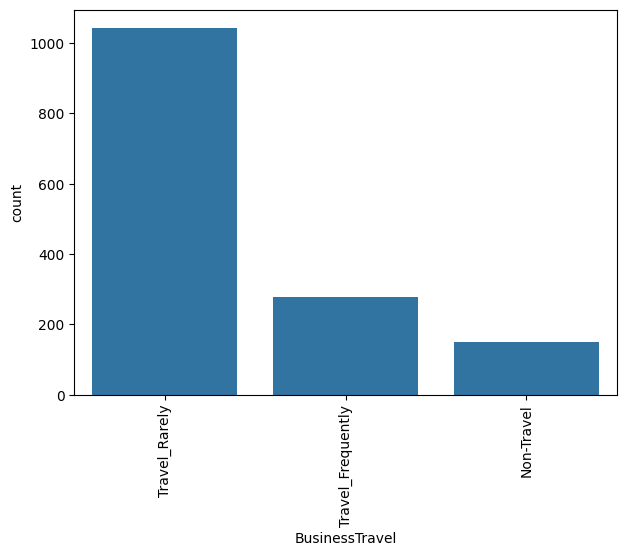

##########################################
                        Department      Ratio
Department                                   
Research & Development         961  65.374150
Sales                          446  30.340136
Human Resources                 63   4.285714


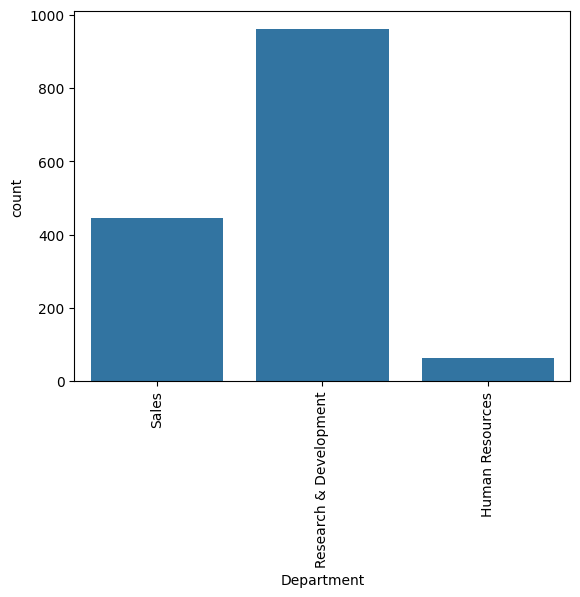

##########################################
                  EducationField      Ratio
EducationField                             
Life Sciences                606  41.224490
Medical                      464  31.564626
Marketing                    159  10.816327
Technical Degree             132   8.979592
Other                         82   5.578231
Human Resources               27   1.836735


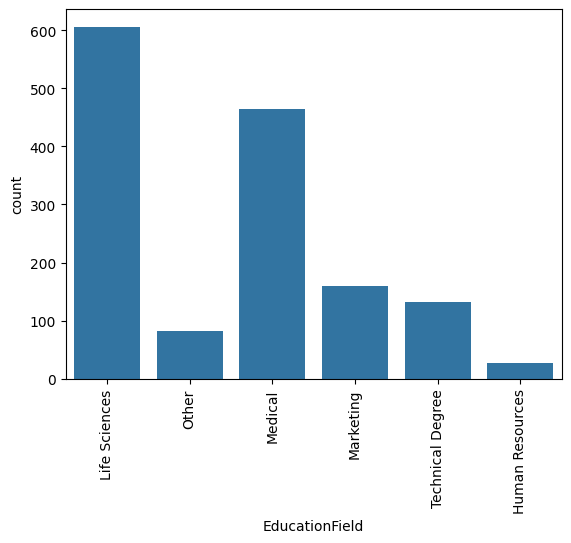

##########################################
        Gender  Ratio
Gender               
Male       882   60.0
Female     588   40.0


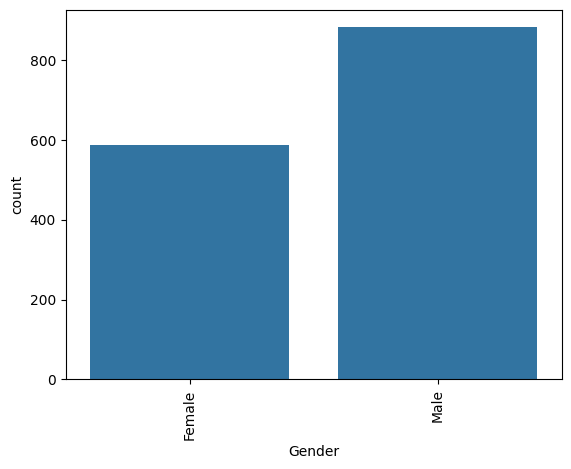

##########################################
                           JobRole      Ratio
JobRole                                      
Sales Executive                326  22.176871
Research Scientist             292  19.863946
Laboratory Technician          259  17.619048
Manufacturing Director         145   9.863946
Healthcare Representative      131   8.911565
Manager                        102   6.938776
Sales Representative            83   5.646259
Research Director               80   5.442177
Human Resources                 52   3.537415


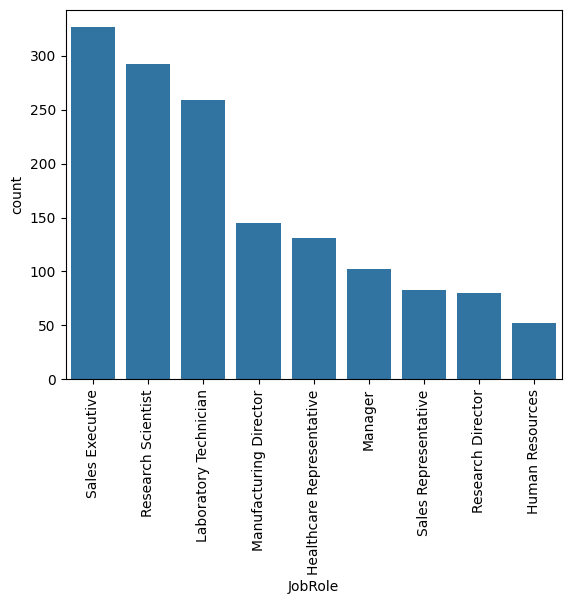

##########################################
               MaritalStatus      Ratio
MaritalStatus                          
Married                  673  45.782313
Single                   470  31.972789
Divorced                 327  22.244898


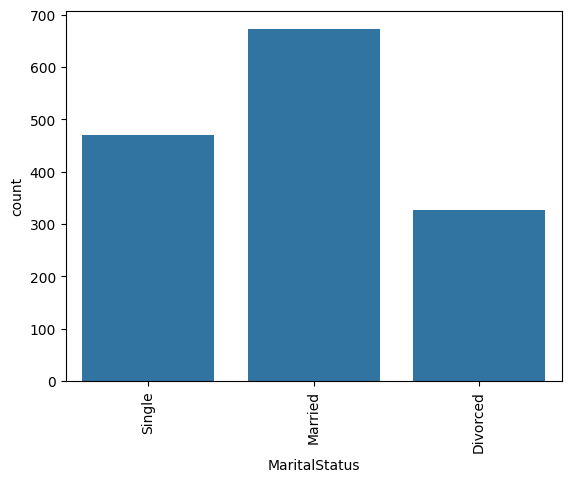

##########################################
          OverTime     Ratio
OverTime                    
No            1054  71.70068
Yes            416  28.29932


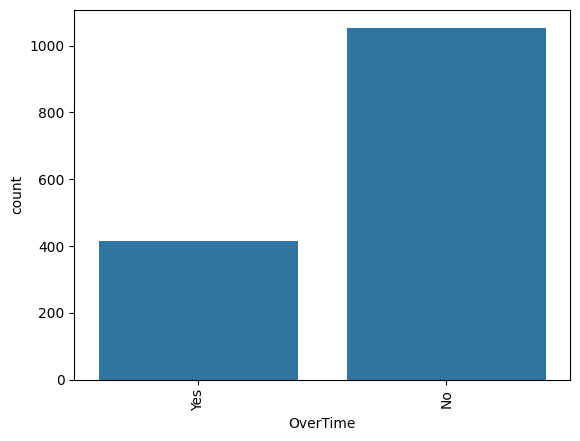

##########################################


In [51]:
plt.figure(figsize=(7, 5))

def cat_summary(df, col_name, plot=False):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))

    if plot:
        ax = sns.countplot(x=df[col_name], data=df)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.show(block=True)

for col in cat_cols:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)
        cat_summary(df, col, plot=True)

    else:
        cat_summary(df, col, plot=True)
        print("##########################################")

# select columns which are categorical except Attrition to graph VS Attrition

In [52]:
cat_cols= df.drop('Attrition',axis=1).select_dtypes(['object']).columns
cat_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

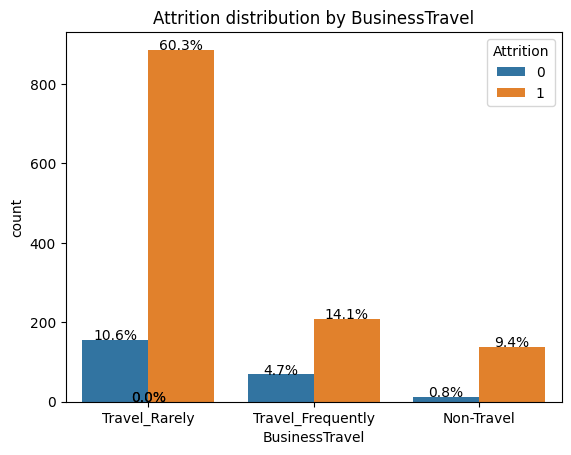

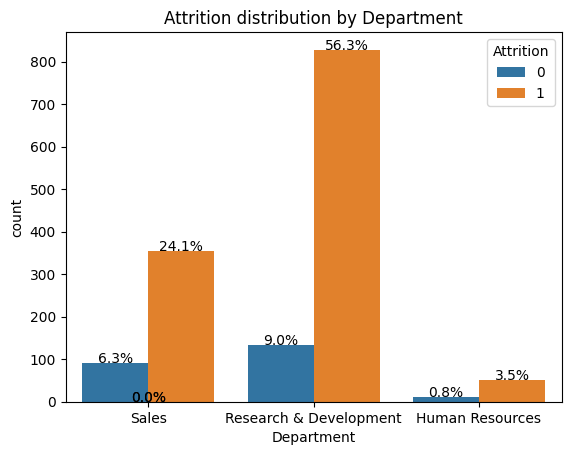

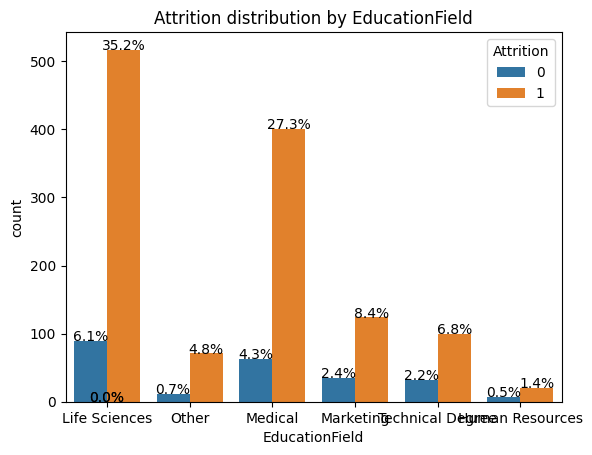

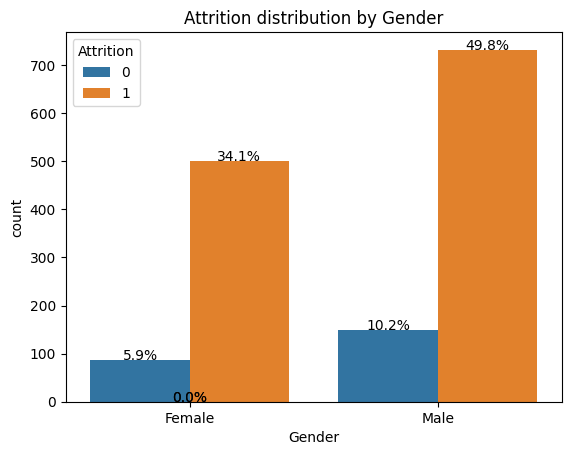

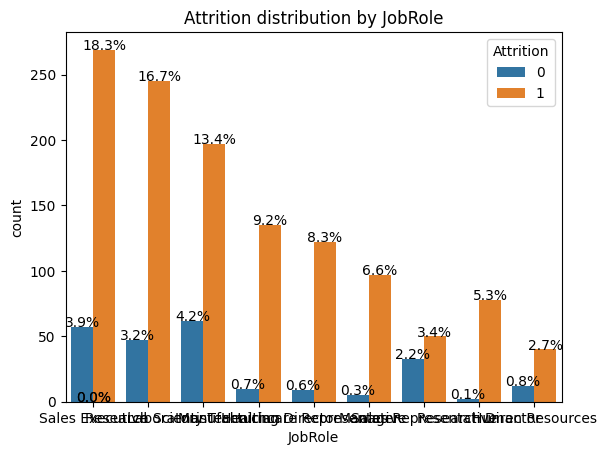

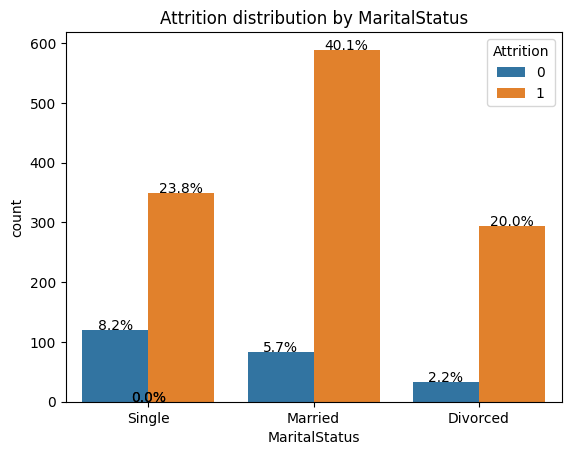

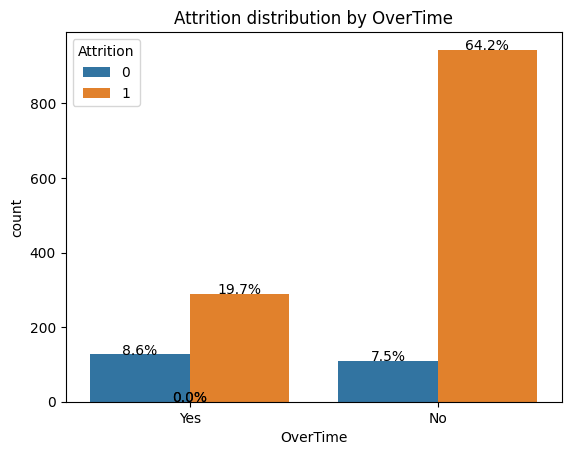

In [53]:
for col in cat_cols:
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.title("Attrition distribution by " + col)

    ax = plt.gca()
    total_height = len(df['Attrition'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')

    plt.show()

# look at the averages of numeric variables for the Target variable

In [54]:
#Numerical Columns
num = df.select_dtypes(['number']).columns

def target_summary_with_num(df, target, numerical_col):
    print(df.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


for col in num:
    target_summary_with_num(df, "Attrition", col)

                 Age
Attrition           
0          33.607595
1          37.561233


           Attrition
Attrition           
0                0.0
1                1.0


            DailyRate
Attrition            
0          750.362869
1          812.504461


           DistanceFromHome
Attrition                  
0                 10.632911
1                  8.915653


           Education
Attrition           
0           2.839662
1           2.927007


           EnvironmentSatisfaction
Attrition                         
0                         2.464135
1                         2.771290


           HourlyRate
Attrition            
0           65.573840
1           65.952149


           JobInvolvement
Attrition                
0                2.518987
1                2.770479


           JobLevel
Attrition          
0          1.637131
1          2.145985


           JobSatisfaction
Attrition                 
0                 2.468354
1                 2.778589


        

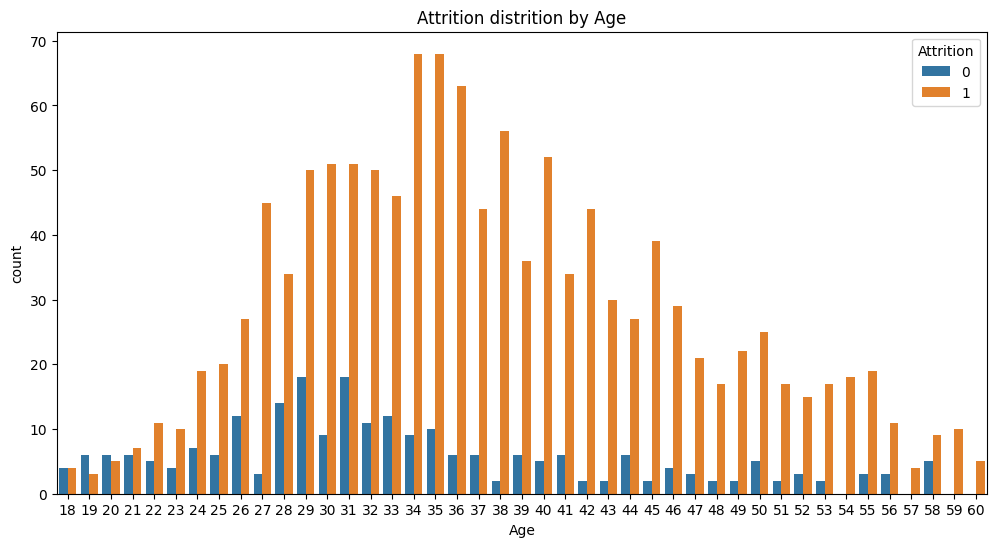

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(x="Age", hue='Attrition', data=df)
plt.title("Attrition distrition by Age" )
plt.show()

<Figure size 500x1000 with 0 Axes>

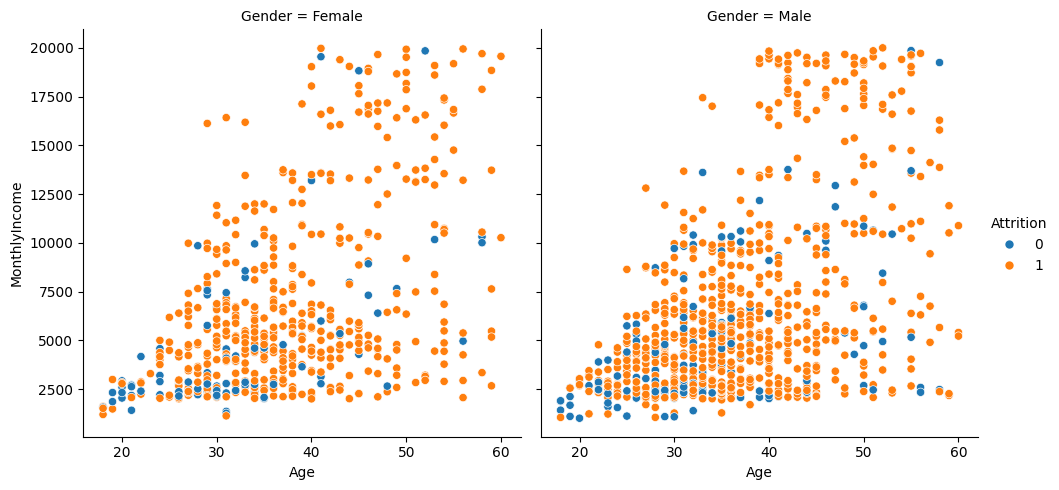

In [56]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='Age',hue='Attrition',col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

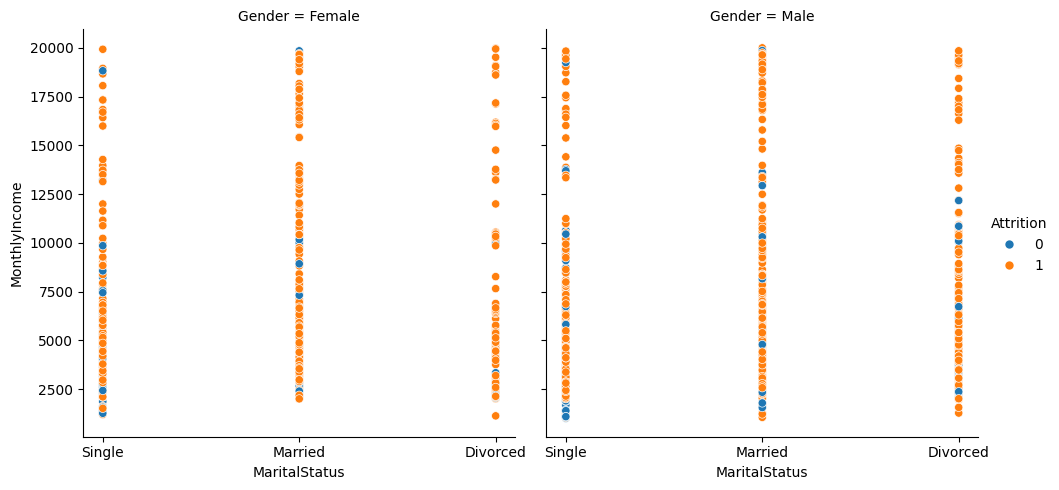

In [57]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='MaritalStatus',hue='Attrition',col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

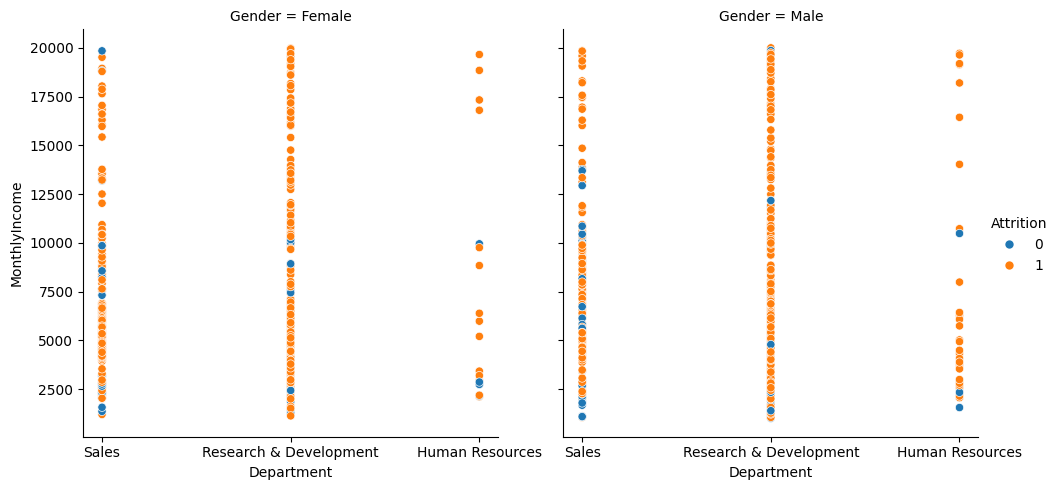

In [58]:
plt.figure(figsize=(5,10))
sns.relplot(data=df,y='MonthlyIncome',x='Department',hue='Attrition',col='Gender')
plt.show()

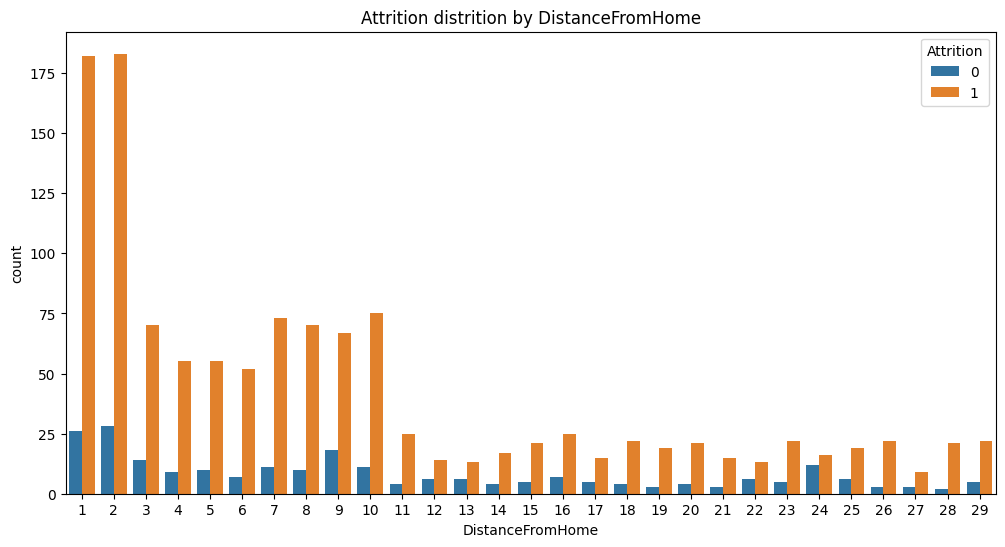

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(x="DistanceFromHome", hue='Attrition', data=df)
plt.title("Attrition distrition by DistanceFromHome" )
plt.show()

In [60]:
# encoding categorical variables

df = df.copy()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Split dataframe into X and y

In [61]:
X=df.drop(columns='Attrition')
y=df['Attrition']

# split dataframe into train and test

In [62]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=42)

# Random Forest Classifier

In [63]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train , y_train)
RF_model.score(X_train , y_train)
RF_pred = RF_model.predict(X_test)
print( 'accuracy score: ' ,accuracy_score(y_test , RF_pred))

accuracy score:  0.8722826086956522


In [64]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       0.57      0.08      0.15        48
           1       0.88      0.99      0.93       320

    accuracy                           0.87       368
   macro avg       0.72      0.54      0.54       368
weighted avg       0.84      0.87      0.83       368



Text(95.72222222222221, 0.5, 'Truh')

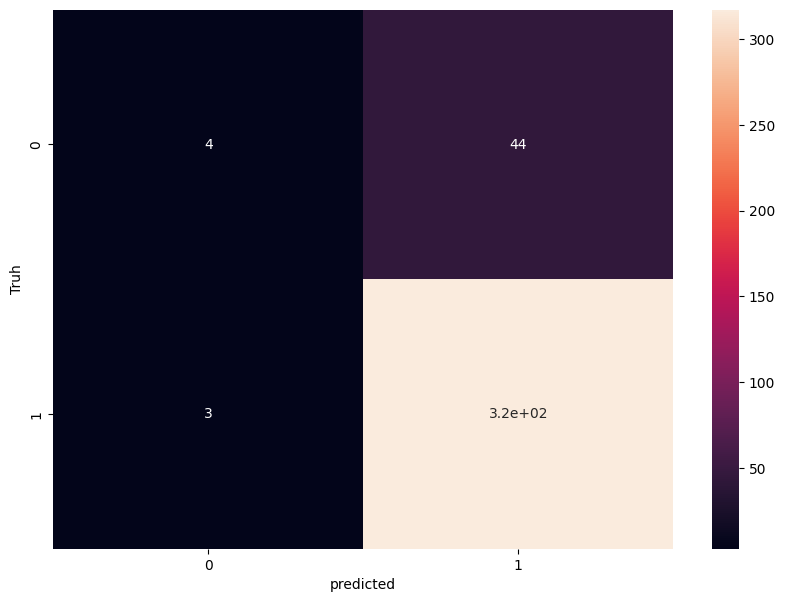

In [65]:
cm1 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')